# Question 1

Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials. Occupations Step 1. Import the necessary libraries Step 2. Import the dataset from this address. Step 3. Assign it to a variable called users Step 4. Discover what is the mean age per occupation Step 5. Discover the Male ratio per occupation and sort it from the most to the least Step 6. For each occupation, calculate the minimum and maximum ages Step 7. For each combination of occupation and sex, calculate the mean age Step 8. For each occupation present the percentage of women and men


In [1]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep ='|')
mean_age = users.groupby('occupation')['age'].mean()
male_ratio = users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()
male_ratio_sort = male_ratio.sort_values(ascending=False)
min_max_ages = users.groupby('occupation')['age'].agg(['min', 'max'])
meanagepercombination = users.groupby(['occupation', 'gender'])['age'].mean()
genderpercentageperoccupation = users.groupby(['occupation', 'gender'])['gender'].count() / users.groupby('occupation')['gender'].count() * 100

print("Mean Age per Occupation:")
print(mean_age)

print("\nMale Ratio per Occupation (Sorted):\n")
print(male_ratio_sort)


print("\nMinimum and Maximum Ages per Occupation:\n")
print(min_max_ages)

print("\nMean Age per Combination of Occupation and Gender:\n")
print(meanagepercombination)

print("\nGender Percentage per Occupation:\n")
print(genderpercentageperoccupation)

Mean Age per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation (Sorted):

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other     

# Question 2

Euro Teams Step 1. Import the necessary libraries Step 2. Import the dataset from this address Step 3. Assign it to a variable called euro12 Step 4. Select only the Goal column Step 5. How many team participated in the Euro2012? Step 6. What is the number of columns in the dataset? Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline Step 8. Sort the teams by Red Cards, then to Yellow Cards Step 9. Calculate the mean Yellow Cards given per Team Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G Step 12. Select the first 7 columns Step 13. Select all columns except the last 3 Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [2]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)
goals = euro12['Goals']
teamNo = euro12.shape[0]  # Number of rows in the dataframe
columns = euro12.shape[1]  # Number of columns in the dataframe
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
sorteddiscipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
meanyellowcards = discipline.groupby('Team')['Yellow Cards'].mean()
teamsmorethansixgoals = euro12[euro12['Goals'] > 6]
teamsstartingwith_G = euro12[euro12['Team'].str.startswith('G')]
firstsevencolumns = euro12.iloc[:, :7]
allcolumnsexceptlastthree = euro12.iloc[:, :-3]
shootingaccuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

print("Number of teams participated in Euro2012:", teamNo)

print("Number of columns in the dataset:", columns)

print("\nTop 5 rows of the Euro12 dataset:")
print(euro12.head())

print("\nGoals column:")
print(goals)

print("\nDiscipline dataframe:")
print(discipline)

print("\nTeams sorted by Red Cards and Yellow Cards:")
print(sorteddiscipline)

print("\nMean Yellow Cards given per Team:")
print(meanyellowcards)

print("\nTeams that scored more than 6 goals:")
print(teamsmorethansixgoals)

print("\nTeams starting with 'G':")
print(teamsstartingwith_G)

print("\nFirst 7 columns:")
print(firstsevencolumns)

print("\nAll columns except the last 3:")
print(allcolumnsexceptlastthree)

print("\nShooting Accuracy for England, Italy, and Russia:")
print(shootingaccuracy)



Number of teams participated in Euro2012: 16
Number of columns in the dataset: 35

Top 5 rows of the Euro12 dataset:
             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4

# Question 3

Housing Step 1. Import the necessary libraries Step 2. Create 3 differents Series, each of length 100, as follows: The first a random number from 1 to 4 The second a random number from 1 to 3 The third a random number from 10,000 to 30,000 Step 3. Create a DataFrame by joinning the Series by column Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn' Step 6. Ops it seems it is going only until index 99. Is it true? Step 7. Reindex the DataFrame so it goes from 0 to 299

In [3]:
# Create Series with random numbers
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))
# Create a DataFrame by joining the Series
housing_df = pd.concat([series1, series2, series3], axis=1)
bigcolumn = pd.concat([series1, series2, series3], axis=0)
bigcolumn = bigcolumn.reset_index(drop=True)
# Check if bigcolumn goes until index 99
goes_until_99 = bigcolumn.index.max() == 99
housing_df = housing_df.reindex(range(300))


# In[25]:


print("Series 1:")
print(series1)

print("\nSeries 2:")
print(series2)

print("\nSeries 3:")
print(series3)

print("\nHousing DataFrame:")
print(housing_df)

print("\nBig Column DataFrame:")
print(bigcolumn)

print("\nDoes it go until index 99?", goes_until_99)

print("\nReindexed Housing DataFrame:")
print(housing_df)

Series 1:
0     1
1     3
2     1
3     3
4     3
     ..
95    4
96    4
97    4
98    4
99    3
Length: 100, dtype: int32

Series 2:
0     3
1     3
2     1
3     3
4     2
     ..
95    2
96    1
97    3
98    1
99    1
Length: 100, dtype: int32

Series 3:
0     26029
1     10312
2     11971
3     29027
4     13649
      ...  
95    19665
96    18830
97    14774
98    11770
99    11183
Length: 100, dtype: int32

Housing DataFrame:
       0    1        2
0    1.0  3.0  26029.0
1    3.0  3.0  10312.0
2    1.0  1.0  11971.0
3    3.0  3.0  29027.0
4    3.0  2.0  13649.0
..   ...  ...      ...
295  NaN  NaN      NaN
296  NaN  NaN      NaN
297  NaN  NaN      NaN
298  NaN  NaN      NaN
299  NaN  NaN      NaN

[300 rows x 3 columns]

Big Column DataFrame:
0          1
1          3
2          1
3          3
4          3
       ...  
295    19665
296    18830
297    14774
298    11770
299    11183
Length: 300, dtype: int32

Does it go until index 99? False

Reindexed Housing DataFrame:
      

# Question 4 

In [4]:
import pandas as pd
import datetime

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
data = pd.read_csv(url, sep="\s+", parse_dates=[[0,1,2]])

data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [5]:
def date_time(d):
    year = d.year - 100 if d.year > 1989 else d.year
    return datetime.date(year, d.month, d.day)
    
data['Yr_Mo_Dy']  = data['Yr_Mo_Dy'].apply(date_time)

data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [6]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [7]:
# Number of non-missing values for each location
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [8]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [9]:
# Calculate the mean windspeeds of the windspeeds over all the locations and all the times
data.sum().sum() / data.notna().sum().sum()

10.227883764282181

In [10]:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [11]:
# create the dataframe
day_st = pd.DataFrame()


day_st['min'] = data.min(axis = 1) 
day_st['max'] = data.max(axis = 1)  
day_st['mean'] = data.mean(axis = 1)
day_st['std'] = data.std(axis = 1) 

day_st.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [12]:
# Find the average windspeed in January for each location.
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [13]:
# Downsample the record to a yearly frequency for each location
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [14]:
# Downsample the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [15]:
# Downsample the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


# Question 5

In [18]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print(chipo.head(10))

# Step 5: Number of observations
num_observations = len(chipo)

# Step 6: Number of columns
num_columns = len(chipo.columns)

# Step 7: Print column names
column_names = chipo.columns

# Step 8: Index type
index_type = chipo.index

# Step 9: Most-ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()

# Step 10: Number of most-ordered item
most_ordered_item_count = chipo['item_name'].value_counts().max()

# Step 11: Most ordered item in choice_description column
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()

# Step 12: Total items ordered
total_items_ordered = chipo['quantity'].sum()

# Step 13: Convert item price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Step 14: Revenue for the period
revenue = chipo['item_price'].sum()

# Step 15: Number of orders
num_orders = chipo['order_id'].nunique()

# Step 16: Average revenue per order
avg_revenue_per_order = revenue / num_orders

# Step 17: Number of different items sold
num_different_items = chipo['item_name'].nunique()

# Print the formatted results
print("\nNumber of observations:", num_observations)
print("Number of columns:", num_columns)
print("Column names:", column_names)
print("Index type:", index_type)
print("Most-ordered item:", most_ordered_item)
print("Number of most-ordered item:", most_ordered_item_count)
print("Most ordered choice description:", most_ordered_choice)
print("Total items ordered:", total_items_ordered)
print("Revenue for the period: ${:.2f}".format(revenue))
print("Number of orders:", num_orders)
print("Average revenue per order: ${:.2f}".format(avg_revenue_per_order))
print("Number of different items sold:", num_different_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

# Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

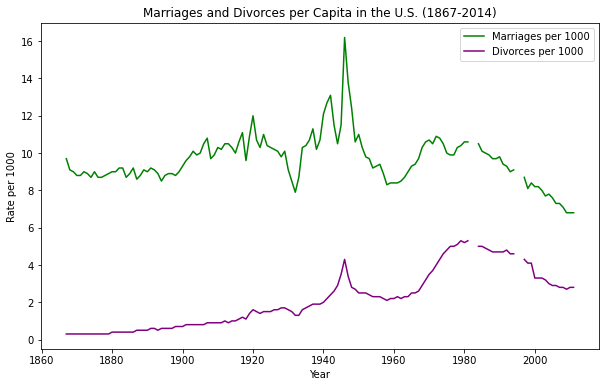

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the data
url = "us-marriages-divorces-1867-2014.csv"  # Replace with the actual URL or file path
data = pd.read_csv(url)

# Create a line plot
plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', color='green')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', color='purple')

plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Rate per 1000')
plt.legend()

plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

C:\Users\16478\AppData\Local\Temp\ipykernel_30688\842041258.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  da = da.append(data.loc[data['Year'] == 1950])
C:\Users\16478\AppData\Local\Temp\ipykernel_30688\842041258.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  da = da.append(data.loc[data['Year'] == 2000])


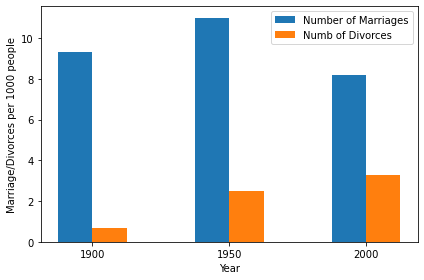

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("us-marriages-divorces-1867-2014.csv")


marriages = data['Marriages_per_1000']
divorces = data['Divorces_per_1000']

year = [1900, 1950, 2000]
ind = ["marriages per capita", "divorces per capita"]

da = data.loc[data['Year'] == 1900]
da = da.append(data.loc[data['Year'] == 1950])
da = da.append(data.loc[data['Year'] == 2000])
columns = da['Marriages_per_1000'], da['Divorces_per_1000']

fig, p = plt.subplots()
bar_width = 0.25
X = np.arange(3)

p = plt.bar(X, columns[0], bar_width, label="Number of Marriages")
p = plt.bar(X + bar_width, columns[1], bar_width, label="Numb of Divorces")

plt.xlabel('Year')
plt.ylabel('Marriage/Divorces per 1000 people')
plt.xticks(X + (bar_width/2) , ("1900", "1950", "2000"))
plt.legend()
plt.tight_layout()

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

Text(0, 0.5, 'Total no of kills')

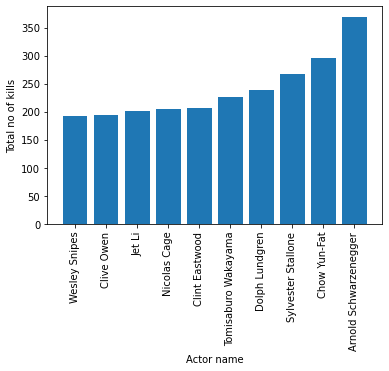

In [23]:
actor_kills_data = pd.read_csv('actor_kill_counts.csv')
kills = actor_kills_data.sort_values(by=['Count'])


actor_names = kills['Actor'].values
kill_counts = kills['Count'].values


plt.bar(actor_names, kill_counts, label=actor_names)
plt.xticks(rotation='vertical')
plt.xlabel("Actor name")
plt.ylabel("Total no of kills")

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

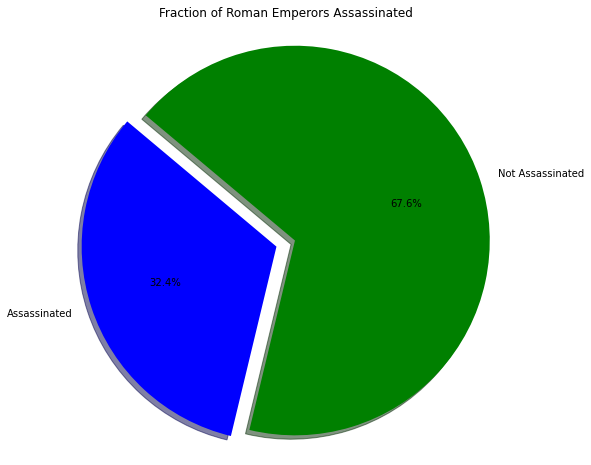

In [24]:
data = pd.read_csv("roman-emperor-reigns.csv")

# Count the number of emperors who were assassinated
assassinated_count = data[data['Cause_of_Death'] == 'Assassinated']['Emperor'].count()

# Count the number of emperors who were not assassinated
not_assassinated_count = len(data) - assassinated_count

# Create data for the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, not_assassinated_count]
colors = ['blue', 'green']
explode = (0.1, 0)  # explode 1st slice

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Fraction of Roman Emperors Assassinated')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.show()

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

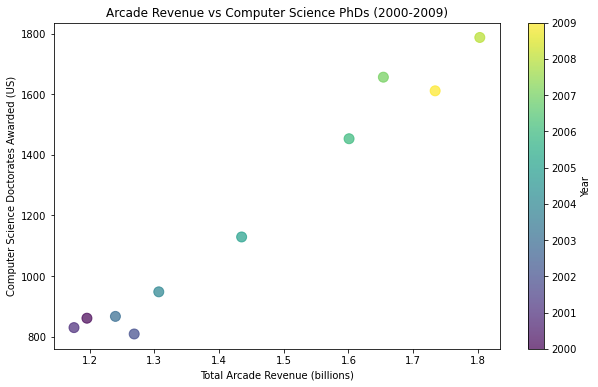

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Create a scatter plot
plt.figure(figsize=(10, 6))

scatter = plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
            c=data['Year'], cmap='viridis', s=100, alpha=0.7)

plt.title('Arcade Revenue vs Computer Science PhDs (2000-2009)')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.colorbar(scatter,label='Year')

plt.show()